In [1]:
import numpy as np
import astropy.units as u

# Some plotting functions

In [2]:
import pylab as plt

In [3]:
from snewpy.rate_calculator import SmearingMatrix, DetectionChannel

In [4]:
def plot_matrix(m: SmearingMatrix):
    plt.pcolormesh(m.bins_true.value, m.bins_smeared.value, m.matrix.T)
    plt.xlabel('$E_{true}$, '+m.bins_true.unit._repr_latex_())
    plt.ylabel('$E_{smeared}$, '+m.bins_smeared.unit._repr_latex_())

In [35]:
def plot_quantity(x:u.Quantity, y:u.Quantity, xlabel=None, ylabel=None, **kwargs):
    #just in case we are passed bare np.arrays iwthout units
    x = u.Quantity(x)
    y = u.Quantity(y)
    
    if(len(x)==len(y)):
        plt.plot(x.value,y.value,**kwargs)
    else:
        plt.stairs(edges=x.value,values=y.value,**kwargs)
    if xlabel is not None:
        if(not x.unit.is_unity()):
            xlabel+=', '+x.unit._repr_latex_()
        plt.xlabel(xlabel)
    if ylabel is not None:
        if(not y.unit.is_unity()):
            ylabel+=', '+y.unit._repr_latex_()
        plt.ylabel(ylabel)

In [36]:
def plot_rate(rate, *args, **kwargs):
    x = rate.energy.to('MeV')
    y = rate.integrate_or_sum('time').array.squeeze()
    plot_quantity(x,y,xlabel='Energy',ylabel='Event rate', **kwargs)


# Reading the detector config from SNOwGLoBES

In [37]:
from snewpy.rate_calculator import RateCalculator

#load the RateCalculator object
rc = RateCalculator()

In [38]:
#read the detector
det = rc.read_detector('icecube')
det

Detector(name="icecube", mass=51600.0 kt, channels=['ibd', 'nue_e', 'nuebar_e', 'numu_e', 'numubar_e', 'nutau_e', 'nutaubar_e', 'nue_O16', 'nuebar_O16', 'nc_nue_O16', 'nc_nuebar_O16', 'nc_numu_O16', 'nc_numubar_O16', 'nc_nutau_O16', 'nc_nutaubar_O16'])

In [39]:
#list all the channels
det.channels

{'ibd': DetectionChannel (name=ibd, flavor=NU_E_BAR, smearing=True),
 'nue_e': DetectionChannel (name=nue_e, flavor=NU_E, smearing=True),
 'nuebar_e': DetectionChannel (name=nuebar_e, flavor=NU_E_BAR, smearing=True),
 'numu_e': DetectionChannel (name=numu_e, flavor=NU_X, smearing=True),
 'numubar_e': DetectionChannel (name=numubar_e, flavor=NU_X_BAR, smearing=True),
 'nutau_e': DetectionChannel (name=nutau_e, flavor=NU_X, smearing=True),
 'nutaubar_e': DetectionChannel (name=nutaubar_e, flavor=NU_X_BAR, smearing=True),
 'nue_O16': DetectionChannel (name=nue_O16, flavor=NU_E, smearing=True),
 'nuebar_O16': DetectionChannel (name=nuebar_O16, flavor=NU_E_BAR, smearing=True),
 'nc_nue_O16': DetectionChannel (name=nc_nue_O16, flavor=NU_E, smearing=True),
 'nc_nuebar_O16': DetectionChannel (name=nc_nuebar_O16, flavor=NU_E_BAR, smearing=True),
 'nc_numu_O16': DetectionChannel (name=nc_numu_O16, flavor=NU_X, smearing=True),
 'nc_numubar_O16': DetectionChannel (name=nc_numubar_O16, flavor=NU_X_

/home/ash/work/snews2/snewpy/python/snewpy/rate_calculator.py:318: RuntimeWarning: divide by zero encountered in log
  return np.interp(np.log(E)/np.log(10), xp, yp, left=0, right=0)*E*1e-38 <<u.cm**2


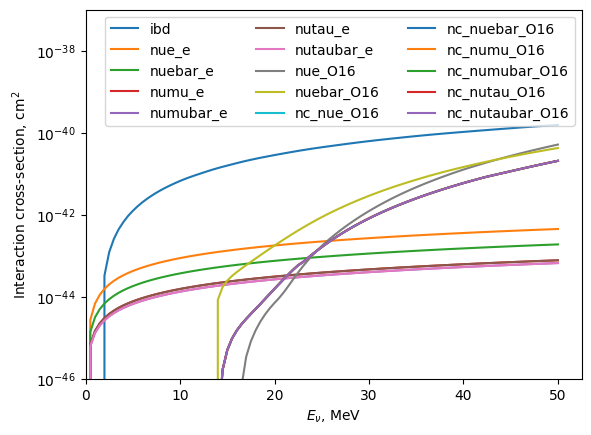

In [40]:
#plot all the channels cross-sections
E = np.linspace(0,50,101)<<u.MeV
for chan in det.channels.values():
    xs = chan.xsec(E)
    plot_quantity(E, xs, r'$E_\nu$', r'Interaction cross-section', label=chan.name)
plt.legend(ncols=3)
plt.yscale('log')
#plt.ylabel(f'Interaction cross-section, {xs.unit._repr_latex_()}')
#plt.xlabel(f'$E_\\nu$, {E.unit._repr_latex_()}')
plt.xlim(0)
plt.ylim(1e-46, 1e-37)
plt.show()

In [41]:
e_true = det.channels['ibd'].smearing.bins_true << u.MeV
e_smear = det.channels['ibd'].smearing.bins_smeared << u.MeV

# Making preSN detectors

In [9]:
from snewpy.models import ccsn
model = ccsn.Bollig_2016(progenitor_mass=27<<u.Msun)
times    = np.linspace(0,2,1500)<<u.second;
energies = np.linspace(0,50,501)<<u.MeV
flux = model.get_flux(t = times, E = energies, distance=10<<u.kpc)

In [42]:
def smearingNue

<Quantity 1000. MeV %>

In [32]:
from snewpy.neutrino import Flavor
from snewpy.rate_calculator import Detector, DetectionChannel

e_true  = np.linspace(0,50,501)<<u.MeV
e_smear = np.linspace(0,50,501)<<u.MeV
det = Detector('baksan', mass=300<<u.kt, 
               channels={
                   'ibd':DetectionChannel('ibd',flavor=Flavor.NU_E_BAR,
                                          xsec=rc.load_xsec('ibd',Flavor.NU_E_BAR),
                                          efficiency=1.)
               })

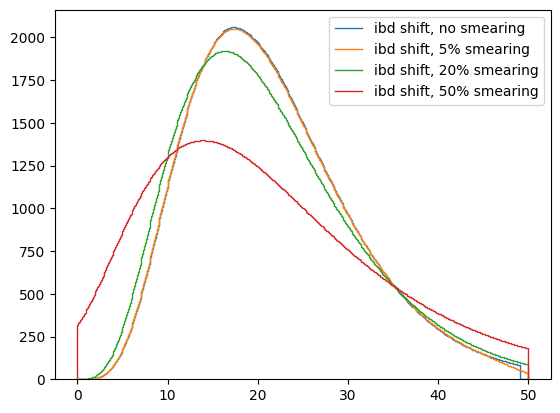

In [36]:
det.channels['ibd'].smearing = smearing=SmearingMatrix.from_Gaussian_blur(
    e_true,e_smear,
    loc=lambda e:e-0.87*u.MeV)
plot_rate(det.run(flux)['ibd'], label='ibd shift, no smearing')

det.channels['ibd'].smearing = smearing=SmearingMatrix.from_Gaussian_blur(
    e_true,e_smear,
    loc=lambda e:e-0.87*u.MeV,
    scale=lambda e:e*0.05,
)
plot_rate(det.run(flux)['ibd'], label='ibd shift, 5% smearing')

det.channels['ibd'].smearing = smearing=SmearingMatrix.from_Gaussian_blur(
    e_true,e_smear,
    loc=lambda e:e-0.87*u.MeV,
    scale=lambda e:e*0.2,
)
plot_rate(det.run(flux)['ibd'], label='ibd shift, 20% smearing')

det.channels['ibd'].smearing = smearing=SmearingMatrix.from_Gaussian_blur(
    e_true,e_smear,
    loc=lambda e:e-0.87*u.MeV,
    scale=lambda e:e*0.5,
)
plot_rate(det.run(flux)['ibd'], label='ibd shift, 50% smearing')

plt.legend()
plt.show()